# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of 5000 each year for a health insurance cover of 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers, now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In order to predict whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Dataset Loading

In [ ]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Dataset Rows : {} \nDataset Columns : {}'.format(data.shape[0],data.shape[1]))

Dataset Rows : 381109 
Dataset Columns : 12


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data[data.duplicated()]

#duplicates =len(data[data.duplicated()])
#print(duplicates)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


Here we see that there are no any duplicate data present.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We checked for null values in the data and found that there are no null values present in the dataset

<Axes: >

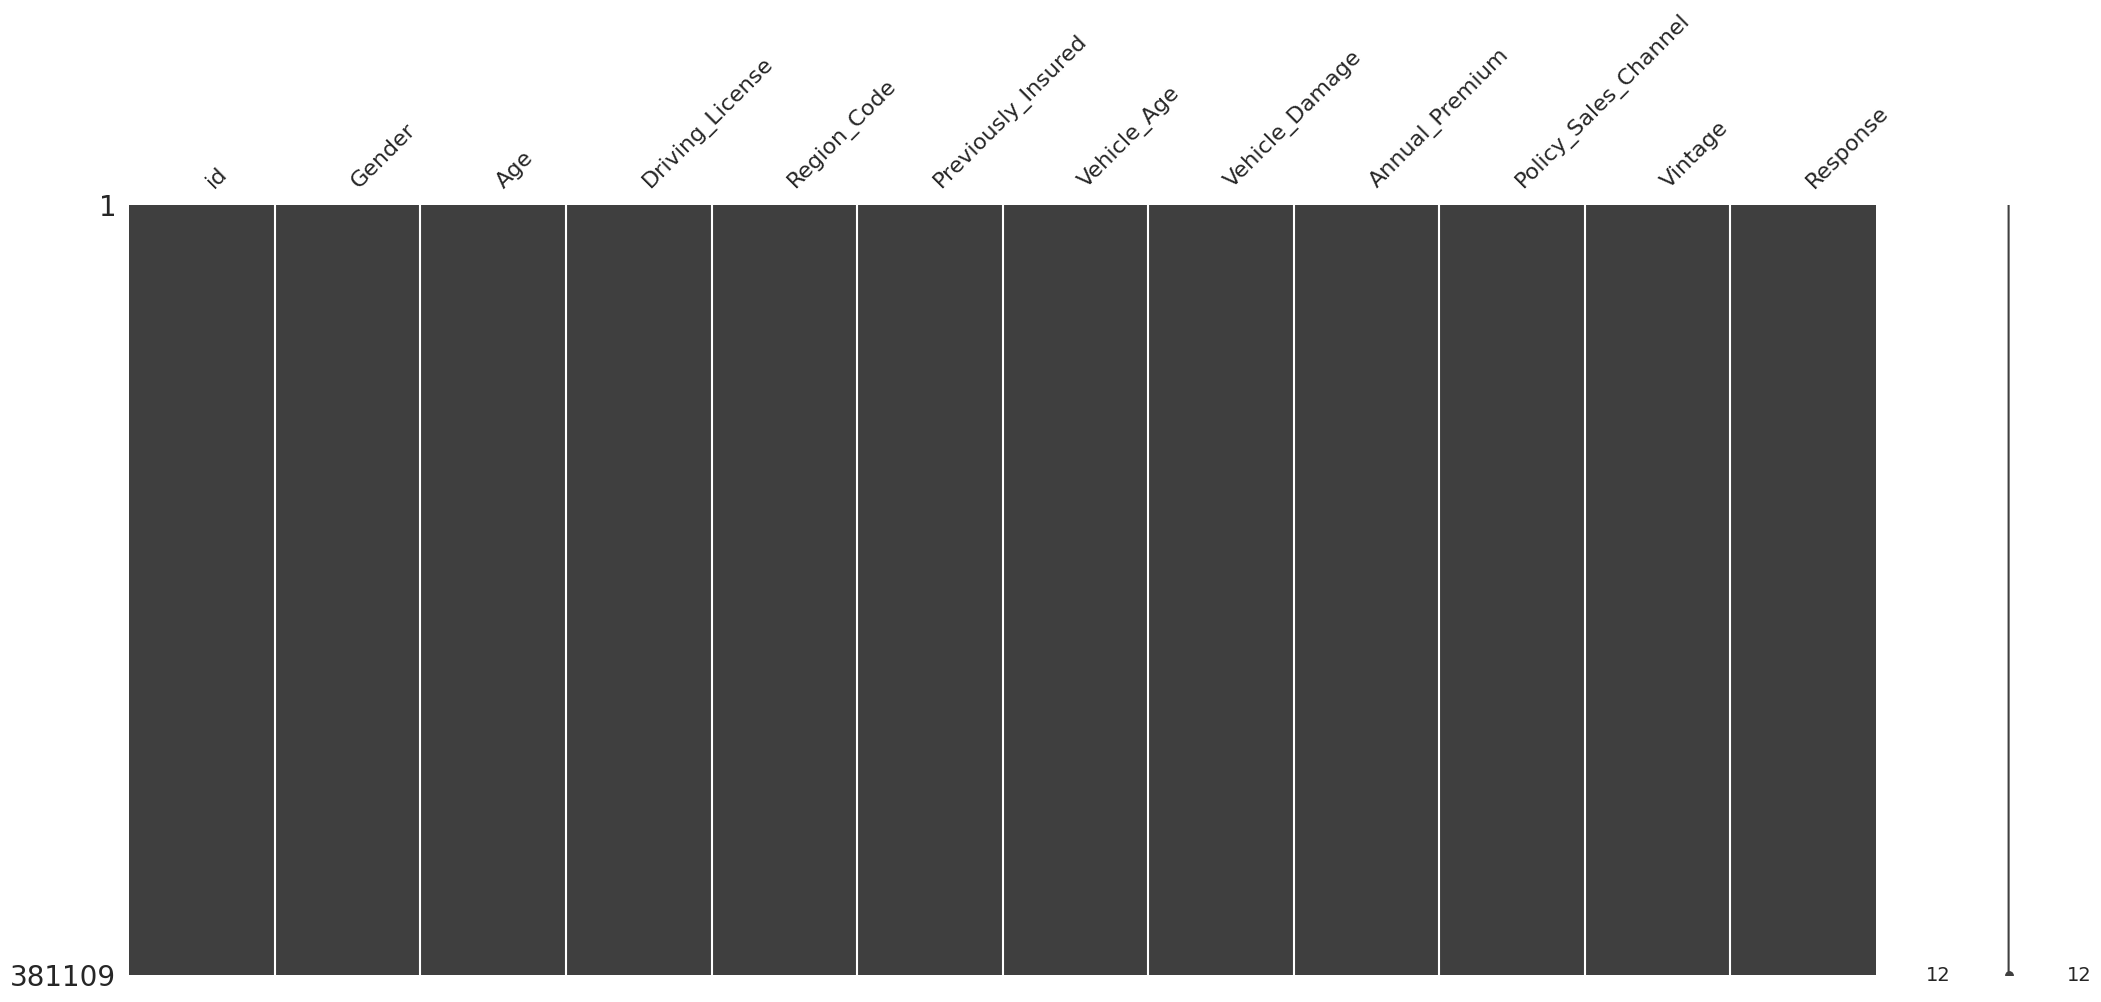

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(data)

### What did you know about your dataset?

- As we can see, our data set contains 381109 rows and 12 columns.     
- We do not have any Null Values in our dataset.             
- We have 4 numeric and 5 categorical independent features.
- Our dependent feature is a categorical column (Response)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

**id**: indicates the id of the data row

**Gender**: indicates the gender of the customer

**Age**: indicates age of the customer

**Driving License**: indicates if the person is having driving license or not

**Region Code**: indicates the region code of the customer

**Previously Insured**: indicates if the customer has perviously insured for policy or not, 1 for yes and 0 for no

**Vehicle Age**: indicates the age of the vehicle owned by the customer

**Vehicle Damage**: indicates if the person has perviously damaged the vehicle

**Annual Premium**: indicates the annual permium for the customer that has to be paid

**Policy Sales Channel**: indicates the sales channel(Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.)

**Vintage**: indicates Number of Days, Customer has been associated with the company

**Response**: indicates if the customer is intersted or not(0 for no and 1 for yes)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in data.columns:
  res = len(data[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")
  if res<=3:
    x = data[column].unique()
    print(f'printing unique values of {column}')
    print('the values are: ', x )
    print('--'*30)

The number of unique variables in id column are: 381109
The number of unique variables in Gender column are: 2
printing unique values of Gender
the values are:  ['Male' 'Female']
------------------------------------------------------------
The number of unique variables in Age column are: 66
The number of unique variables in Driving_License column are: 2
printing unique values of Driving_License
the values are:  [1 0]
------------------------------------------------------------
The number of unique variables in Region_Code column are: 53
The number of unique variables in Previously_Insured column are: 2
printing unique values of Previously_Insured
the values are:  [0 1]
------------------------------------------------------------
The number of unique variables in Vehicle_Age column are: 3
printing unique values of Vehicle_Age
the values are:  ['> 2 Years' '1-2 Year' '< 1 Year']
------------------------------------------------------------
The number of unique variables in Vehicle_Damage

## 3. ***Data Wrangling***

### Data Wrangling Code

- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data

In [ ]:
# Having a copy of the dataframe(can be used as a part of backup incase of loss of data)
df_copy = data.copy()

# dropping the id column
data.drop(['id'],axis=1, inplace=True)

# Converting 'Driving_License' & 'Previously_Insured' from 1,0 to Yes and No using lambda function
data['Driving_License'] = data['Driving_License'].apply(lambda x: 'Yes' if x==1 else "No")
data['Previously_Insured']=data['Previously_Insured'].apply(lambda x: 'Yes' if x==1 else "No")

### What all manipulations have you done and insights you found?

- Dropped the id column as it was irrelevant

- Converted the values in categorical columns 'Driving_License' & 'Previously_Insured' from 1 & 0 to Yes and No for better visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Analysis on the basis of Gender

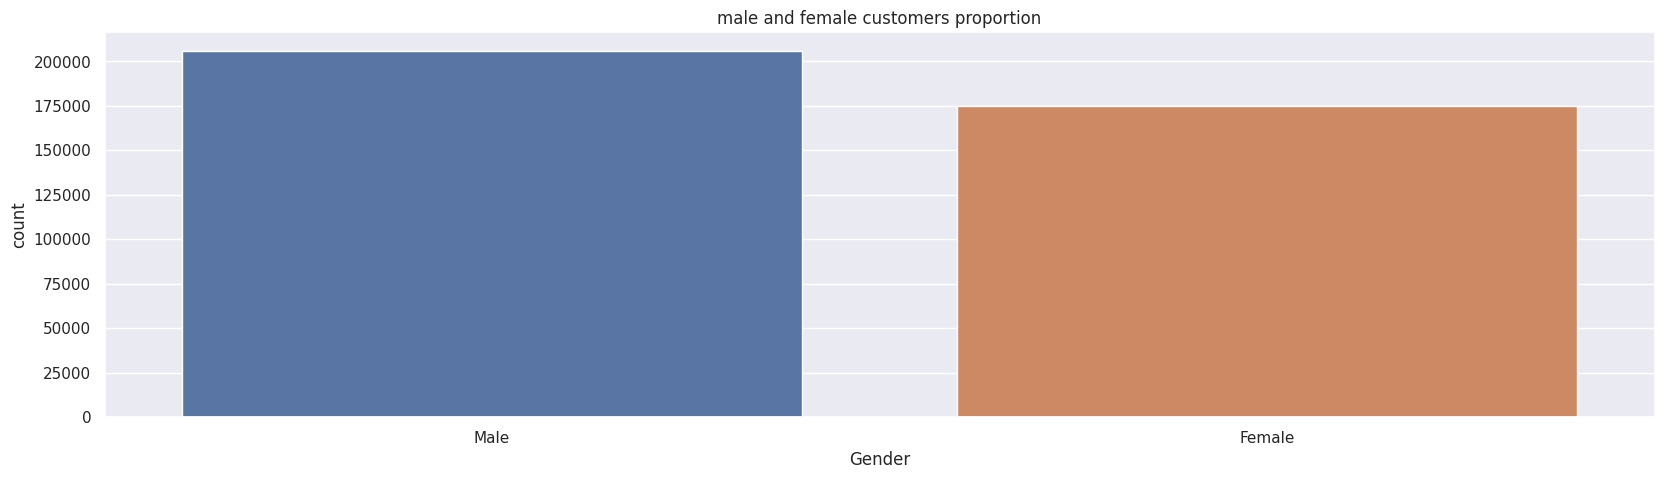

Male      206089
Female    175020
Name: Gender, dtype: int64


In [ ]:
# Chart - 1 visualization code
# Plotting count plot
sns.countplot(x=data['Gender'], data=data)

# Setting chart title
plt.title('male and female customers proportion')

# Display chart
plt.show()

# Printing the counts for reference
print(data.Gender.value_counts())

##### 1. Why did you pick the specific chart?

Countplot is used to show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

There are 206089 Male customers and 175020 Female customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps us to understand the gender ratio of the data.

#### Chart - 2 Customers who previously Insured & Response

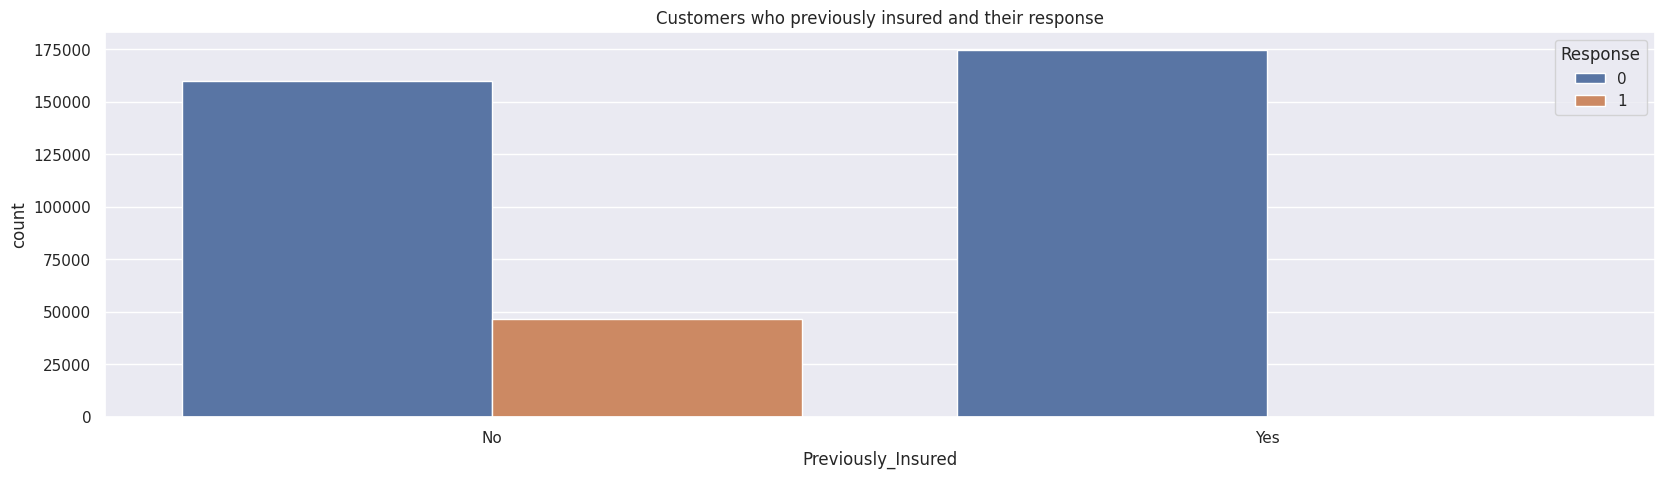

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [ ]:
# Chart - 2 visualization code
sns.countplot(x='Previously_Insured', data=data, hue = 'Response')

# setting chart title
plt.title('Customers who previously insured and their response')

# display chart
plt.show()

# printing the counts for reference
print(data.Previously_Insured.value_counts())

##### 1. Why did you pick the specific chart?

Countplot is used to show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

It is observed that people who have previously not insured are opting in the Insurance policy

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is found from the graph that the people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured

#### Chart - 3 Vechile age and Response

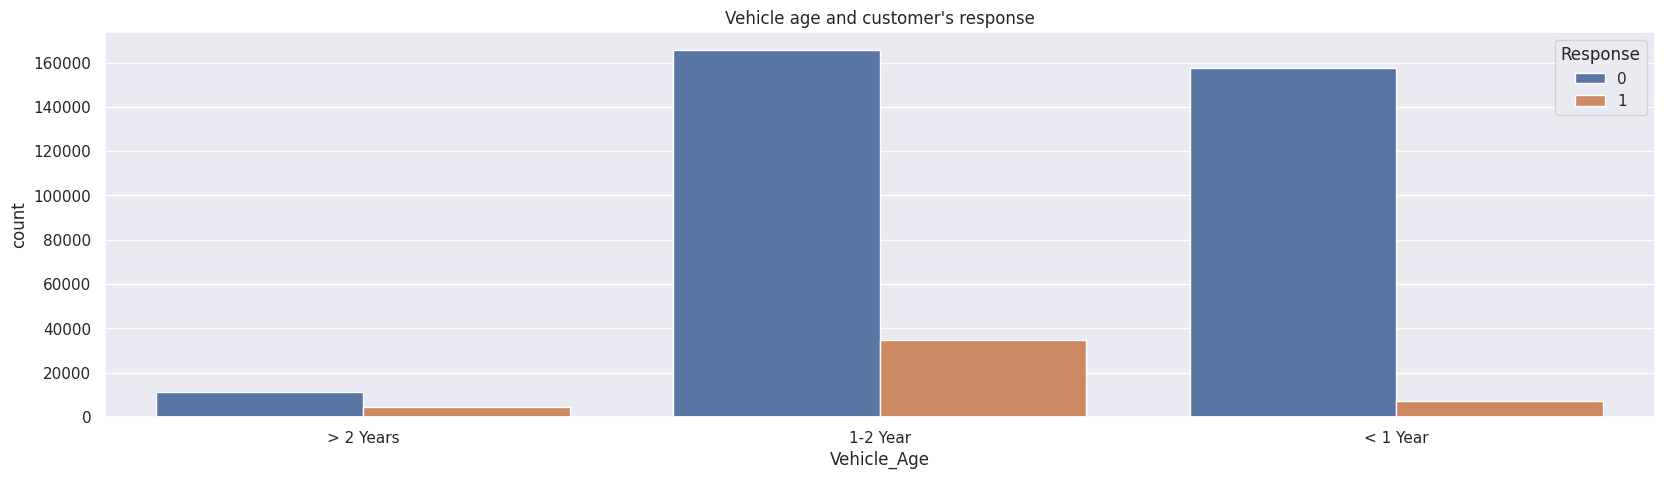

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [ ]:
# Chart - 3 visualization code
sns.countplot(x='Vehicle_Age', data=data, hue = 'Response')

# setting chart title
plt.title('Vehicle age and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(data.Vehicle_Age.value_counts())

##### 1. Why did you pick the specific chart?

Countplot is used to show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

- Majority of the customer's vechile age is from 1-2 yrs age category.
- Also more numbers are showing interest in buying insurance in this age segment of 1-2 yrs.

#### Chart - 4  Vehicle Damage previously and customer's response



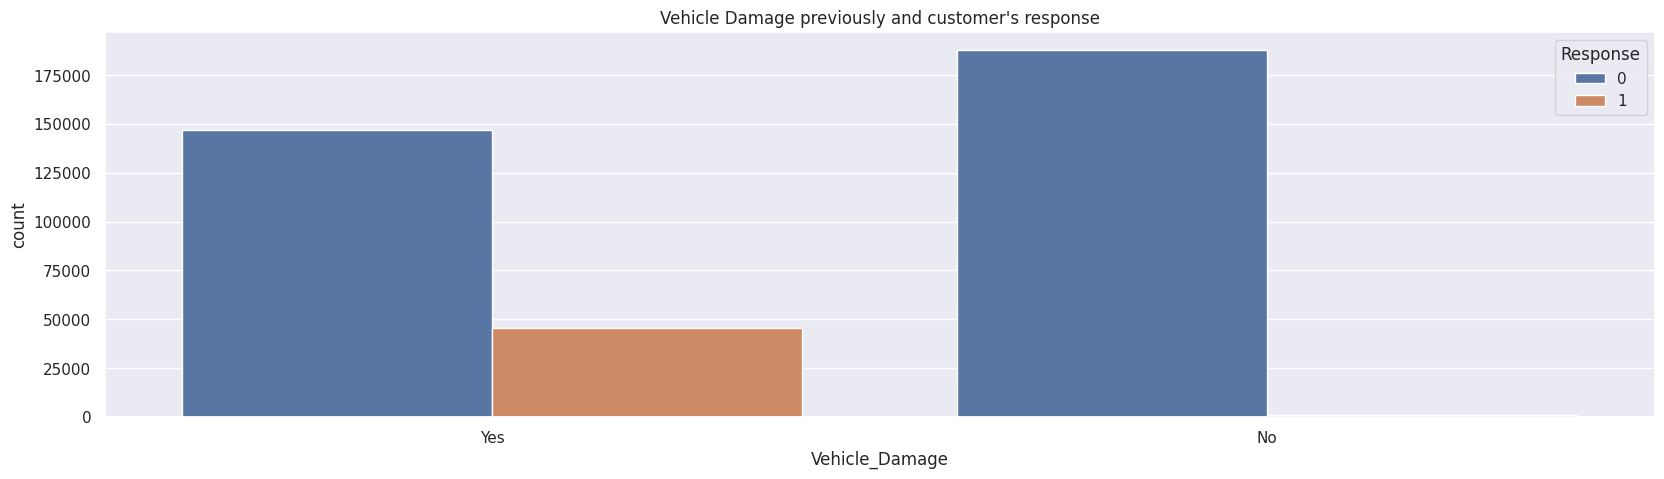

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [ ]:
# Chart - 4 visualization code
sns.countplot(x='Vehicle_Damage', data=data, hue = 'Response')

# setting chart title
plt.title('Vehicle Damage previously and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(data.Vehicle_Damage.value_counts())

##### 1. Why did you pick the specific chart?

Countplot is used to show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Its found that previously customers who got their vehicle damaged are more intrested in buying new policy.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- customers who are previously not damaged their car are not much intrested in buying the policy
- people who have damaged their car previously are more intrested in buying the policy.

#### Chart - 5 Vechile Damage

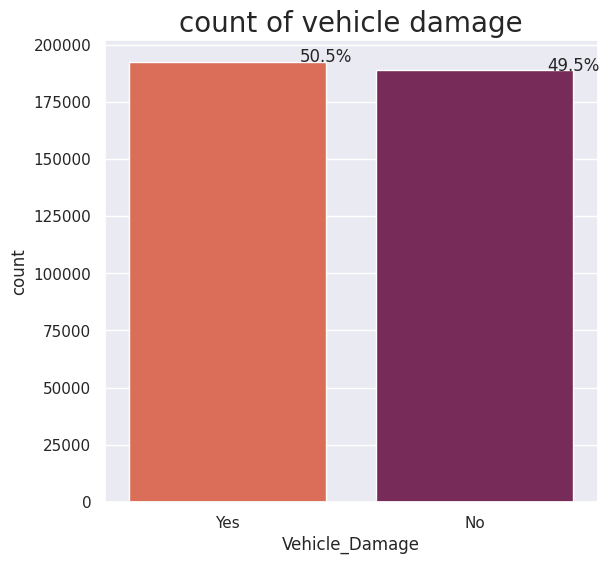

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="darkgrid")
total = float(len(data))
ax1 = sns.countplot(x='Vehicle_Damage',palette="rocket_r", data=data)
plt.title('count of vehicle damage',fontsize=20)

for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')

##### 2. What is/are the insight(s) found from the chart?

- Around 50% of the vehicles are previously damaged.

#### Chart - 6 Histogram analysis of Age

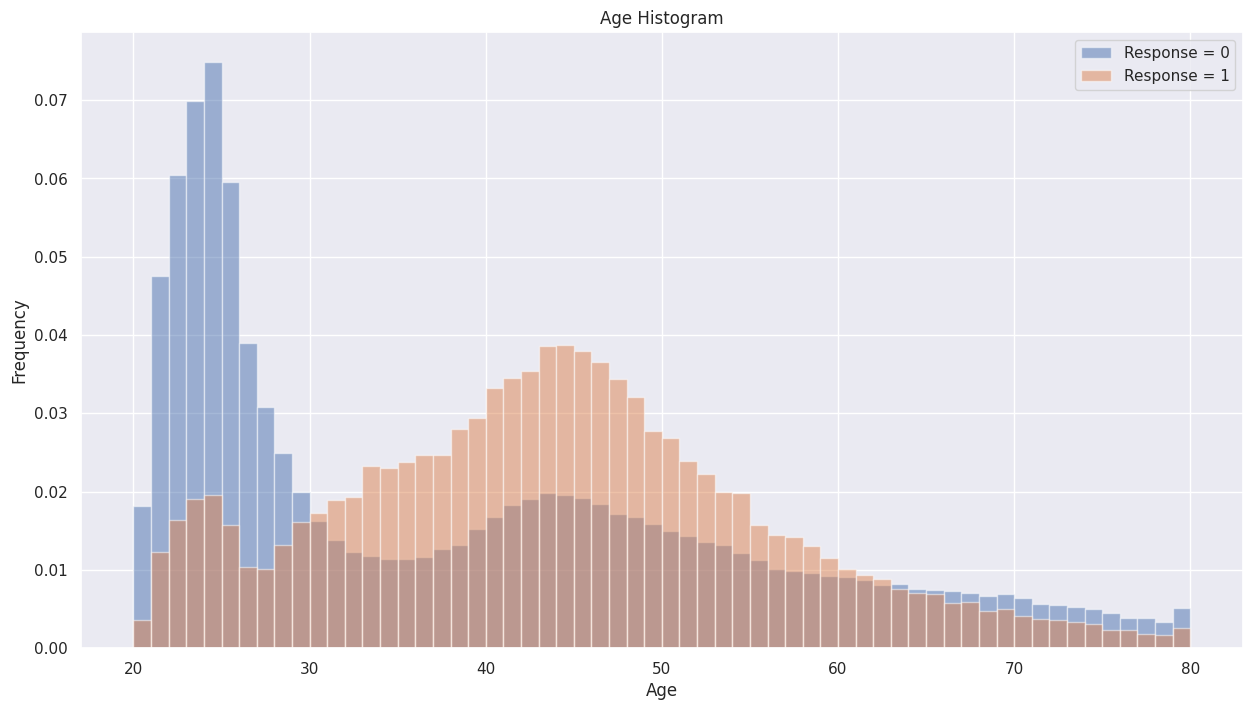

In [ ]:
# Chart - 6 visualization code
#histogram of Age
plt.figure(figsize = (14,6))
data.groupby('Response').Age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(15,8), density = True, alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.legend(['Response = 0', 'Response = 1'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- The dataset has more people with an age of 23 & 24.
- 40 to 60-year-olds had a higher likelihood of purchasing vehicle insurance.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Histogram for Annual Premium

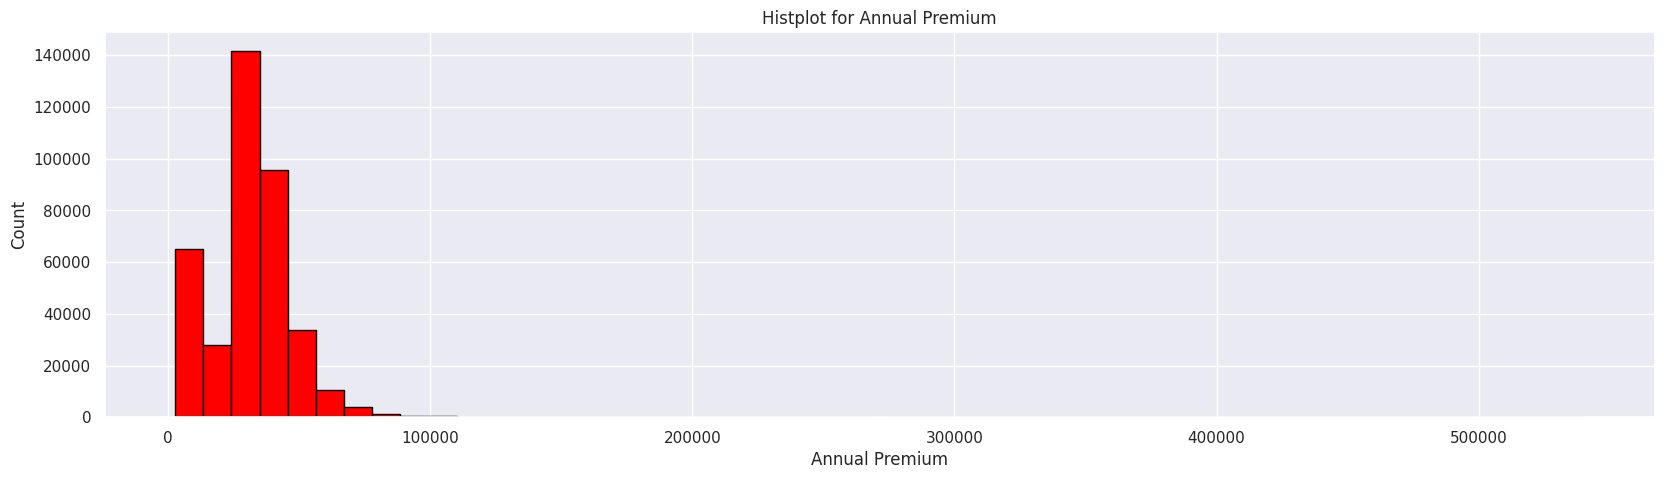

In [ ]:
# Chart - 7 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
plt.hist(data['Annual_Premium'], bins = 50, color='red', edgecolor='black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a graph showing frequency distributions. It is a graph showing the number of observations within each given interval.

##### 2. What is/are the insight(s) found from the chart?

- The cost of the premium falls under range 5000-100000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It can be observed from the graph that there are some premiums whose cost goes above 100000 as well.

#### Chart - 8 Box Plot for Age

<Axes: >

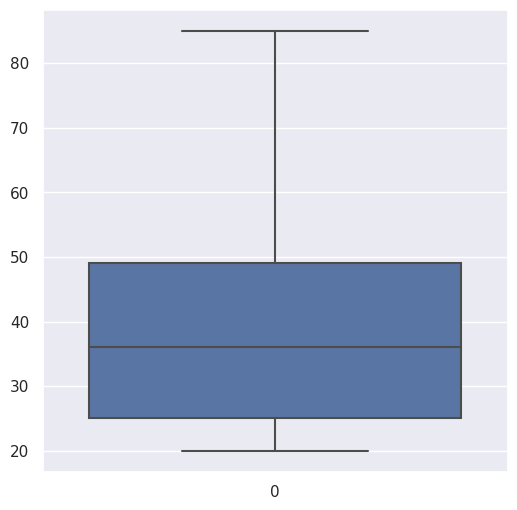

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(data['Age'])

##### 1. Why did you pick the specific chart?

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

##### 2. What is/are the insight(s) found from the chart?

There are no outliers in the age columns and most of the customers belong to age group 25-48 category.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see in the box plot above that there are no outliers in our data for the age column.

#### Chart - 9 Percentage of people with different age and their response ratio

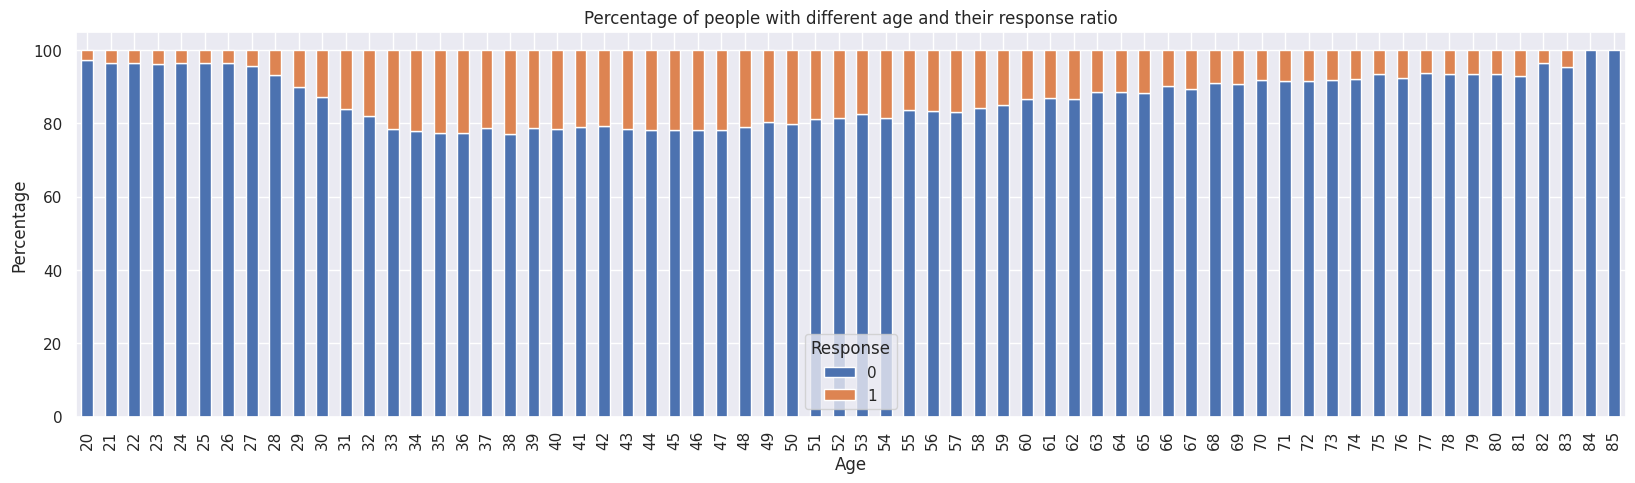

In [ ]:
# Chart - 9 visualization code
age_response = data.groupby(['Age', 'Response']).size().unstack()

#plotting
total_counts = age_response.sum(axis=1)
age_response_ratios = age_response.div(total_counts, axis=0) * 100

# create a stacked bar chart
age_response_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of people with different age and their response ratio')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Response')
plt.show()


##### 1. Why did you pick the specific chart?

Stacked bar charts are excellent for comparing categories and visualizing their composition. As the name suggests, the stacked bar chart is plotted by stacking each group on the one another.

##### 2. What is/are the insight(s) found from the chart?

Customes of age between 32-58 seems to be more intrested in buying the policy.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Here the data shows that people in the age 32-58 are more intrested in insurance policy, so while running ad Campaigns company can focus more on this people and can attract more customers.

#### Chart - 10 Number of customers with respect to various Region code



Text(0, 0.5, 'Number of Customers')

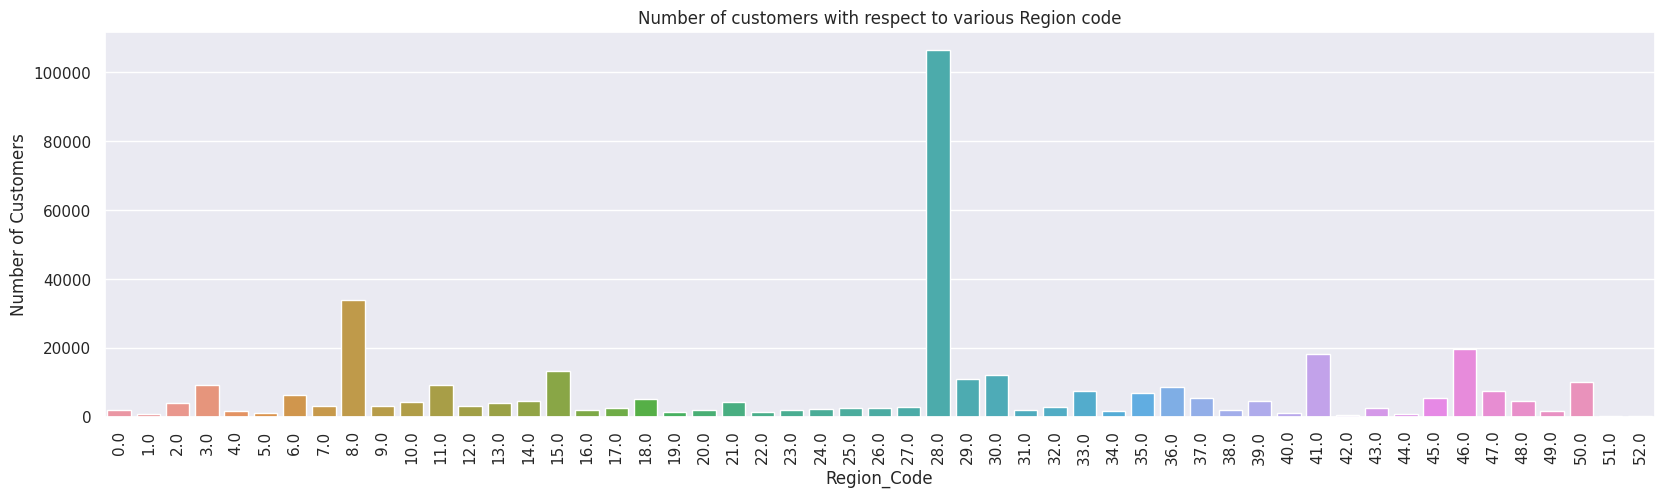

In [ ]:
# Chart - 10 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Region_Code', data=data)

plt.title('Number of customers with respect to various Region code')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.



##### 2. What is/are the insight(s) found from the chart?

We can see from the graph that most of the customers belong to region code 28 followed by 8.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us to understand that most of our customers belong to region code 28, so it would be better if we run our marketing campaign such that in 28 to aquire more customers and d similarly in other regions to penetrate the market.

#### Chart - 11 Driving Licence and Customer Response

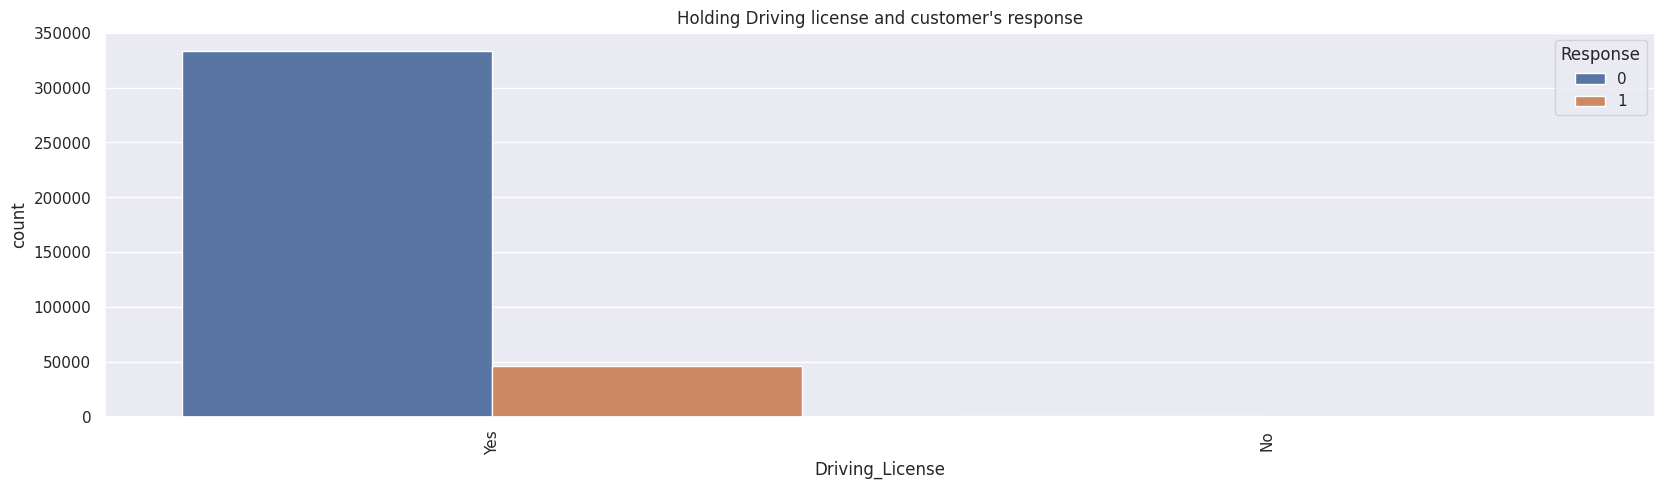

In [ ]:
# Chart - 11 visualization code
sns.countplot(x='Driving_License',hue='Response', data=data)

# setting chart title
plt.title('Holding Driving license and customer\'s response')
plt.xticks(rotation=90)

# display chart
plt.show()



##### 2. What is/are the insight(s) found from the chart?

Its found that most of the customers who do not own driving license are less and are least intreasted, so focusing the customers with license would be more beneficial.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Correlation Heatmap

<ipython-input-291-ba2b1c702c6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Text(0.5, 53.046874999999986, 'Feature/Property')

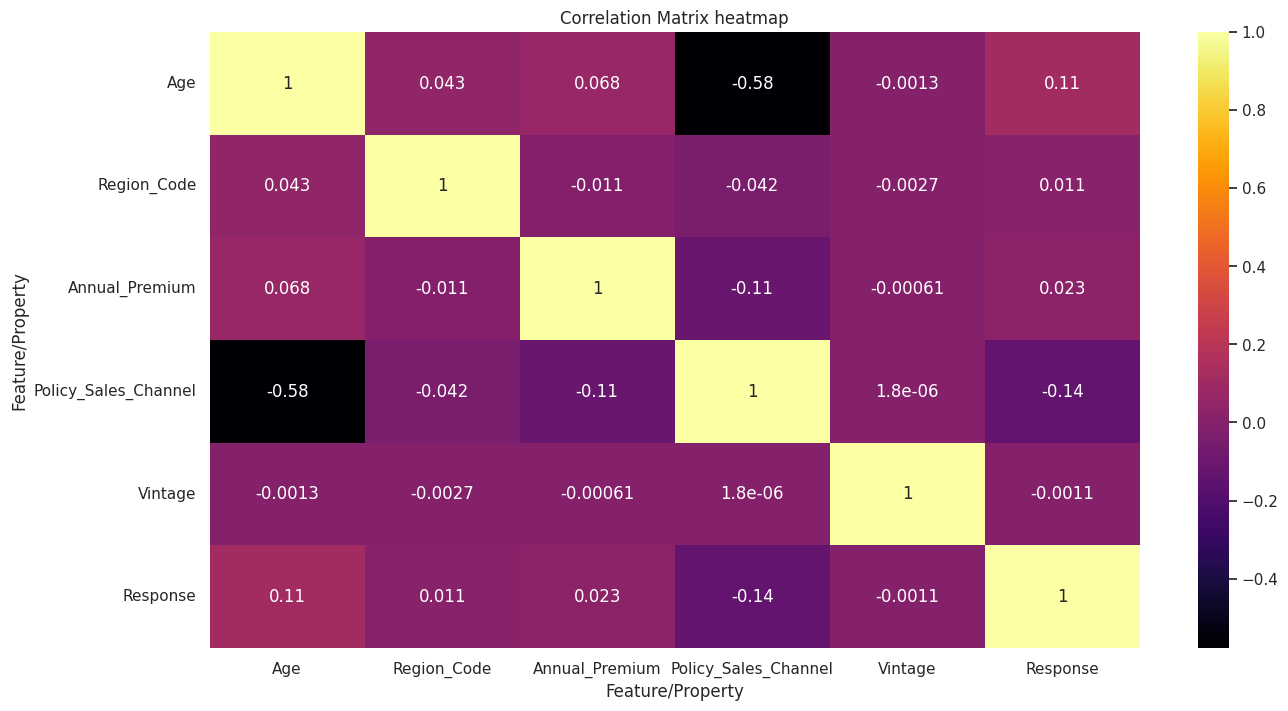

In [ ]:
# Chart - 12 visualization code
corr_matrix = data.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data.

##### 2. What is/are the insight(s) found from the chart?

- It is found that policy sales channel and respons is negativly correlated.
- Also Age and Annual Premium are slighlty positive correlated.



#### Chart - 15 - Pair Plot

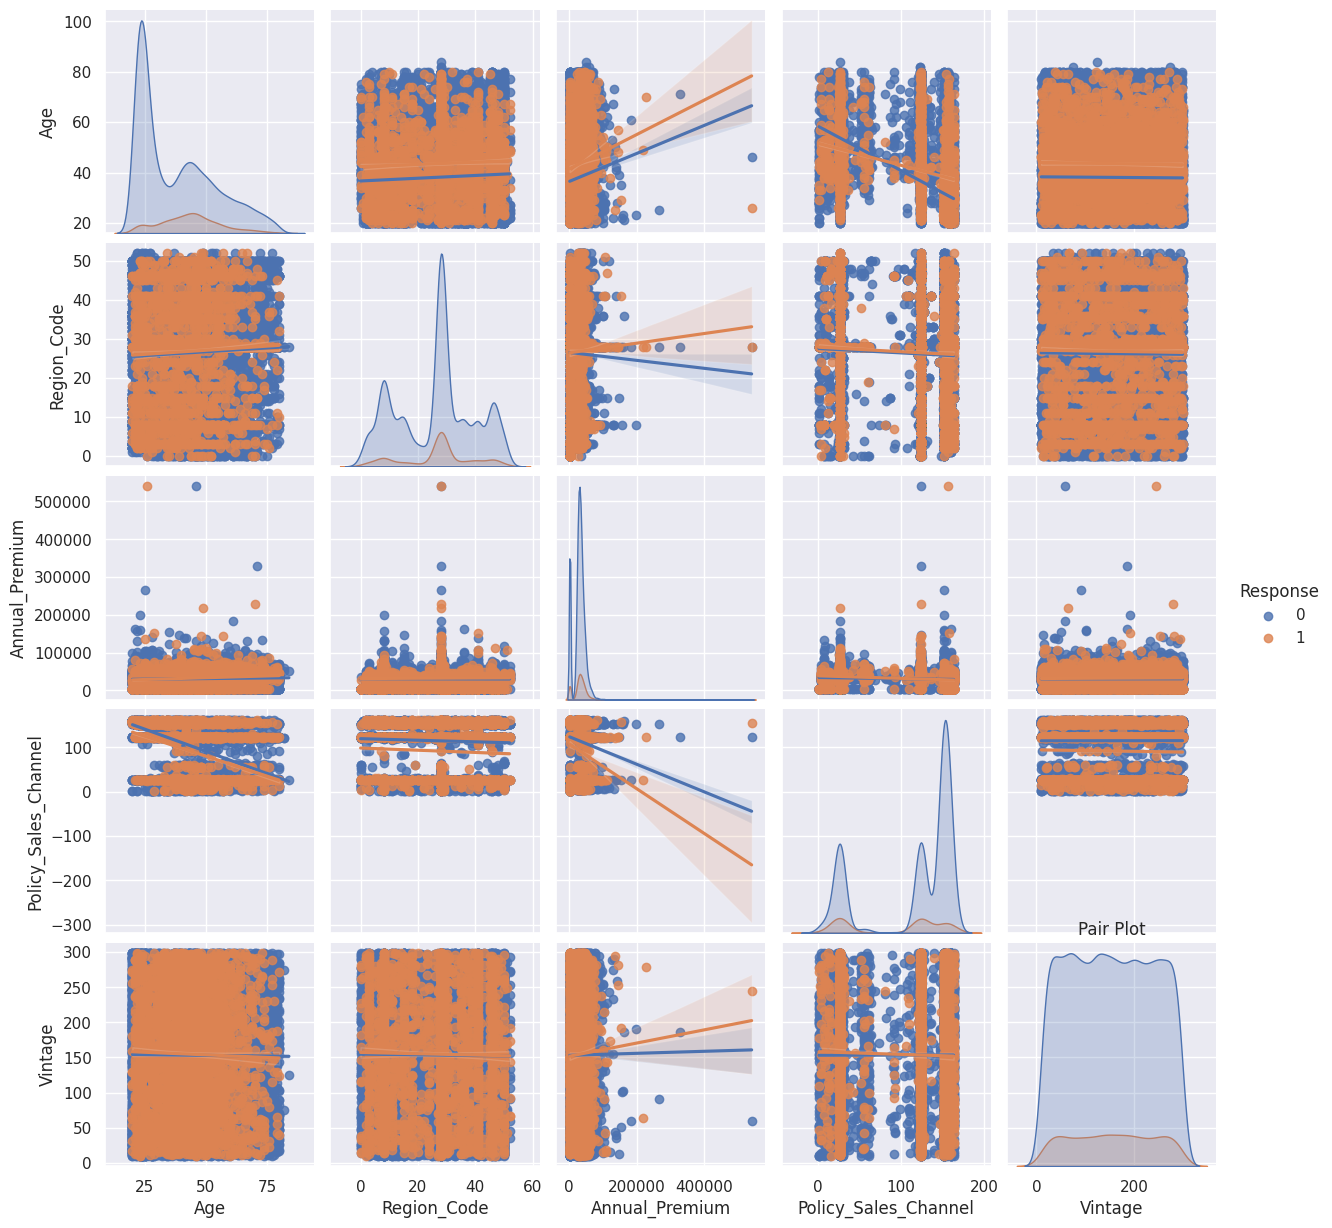

In [ ]:
# Pair Plot visualization code
# For effective vizualization on sample data we considering a subset of data instead of whole data to vizualize pair plot
df_sample = data.sample(n=25000, random_state=48)

# plotting pair plot for the sample database
# setting corner=True can still to reduce computation time, corner=True
sns.pairplot(df_sample, diag_kind="kde", kind = 'reg', hue = 'Response')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

# delete sample data
del df_sample

##### 1. Why did you pick the specific chart?

A pairplot plot a pairwise relationships in a dataset.

##### 2. What is/are the insight(s) found from the chart?

- policy sales channel is negativly corellated to age
- Also Vintage and Annual Premium are correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average annual premium for a vehicle insurance is greater than 15,000.
2. The average age of the customer is greater than 32.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average annual premium for a vehicle insurance is greater than 15,000.

Null hypothesis H0: Average Annual premium not > 15,000.

Alternate hypothesis Ha: Average Annual premium > 15,000.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
annual_premium_sample = data['Annual_Premium'].sample(500)
annual_premium_mean = np.mean(annual_premium_sample)
annual_premium_std = np.std(annual_premium_sample)

In [ ]:

# Computing test statistic

ts = (annual_premium_mean-15000)/(annual_premium_std/(np.sqrt(500)))
print(ts)

23.55978448936922


In [ ]:
# Calculating the probability
from scipy.stats import norm
prob_z = norm.cdf(19.73, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)


1.0
0.0


##### Which statistical test have you done to obtain P-Value?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average anuual premium is greater than 15,000.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average age of the customer is greater than 32.

Null hypothesis H0: Average age not > 32.

Alternate hypothesis Ha: Average age > 32.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
age_sample = data['Age'].sample(500)
age_mean = np.mean(age_sample)
age_std = np.std(age_sample)

In [ ]:
# Computing test statistic

ts = (age_mean-32)/(age_std/(np.sqrt(500)))
print(ts)

10.921849111606798


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.



##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average age f the customer is greater than 32.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

Let's check for outliers in the dataset

In [ ]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

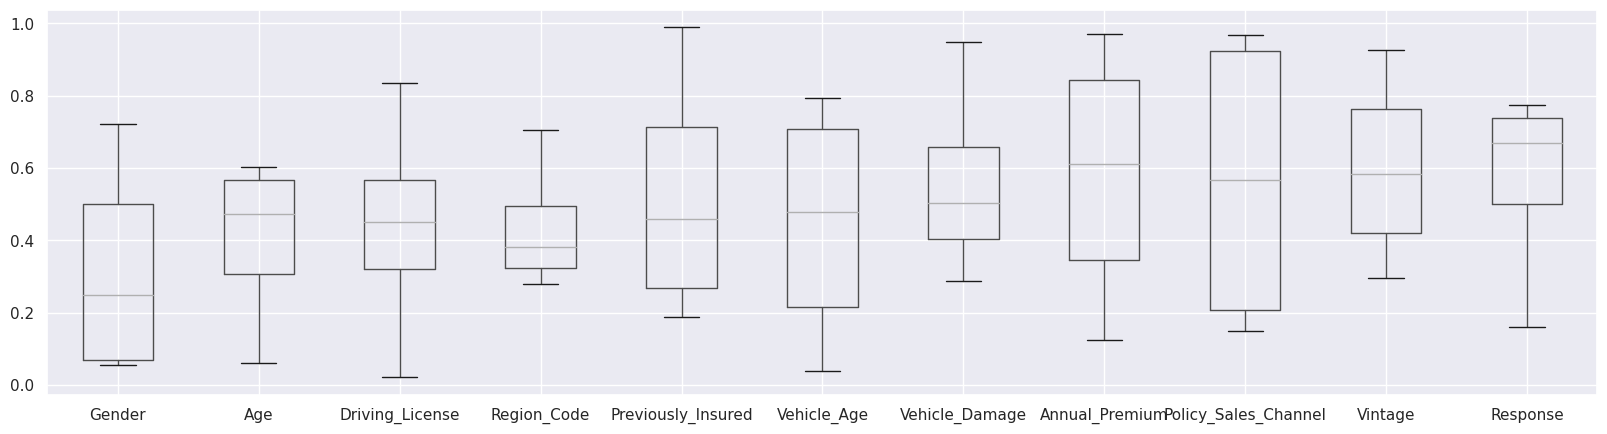

In [ ]:
# Handling Outliers & Outlier treatments
# Plotting the boxplot for 'Annual_Premium'
data_cp = np.random.random(size=(4,11))
df = pd.DataFrame(data_cp,columns = ['Gender','Age','Driving_License','Region_Code' ,'Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Vintage','Response'])

df.boxplot()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7939d0906860>,
 'caps': [<matplotlib.lines.Line2D at 0x7939d24c2320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7939d0907340>],
 'medians': [<matplotlib.lines.Line2D at 0x7939d1a6e5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7939d1a6c790>],
 'means': []}

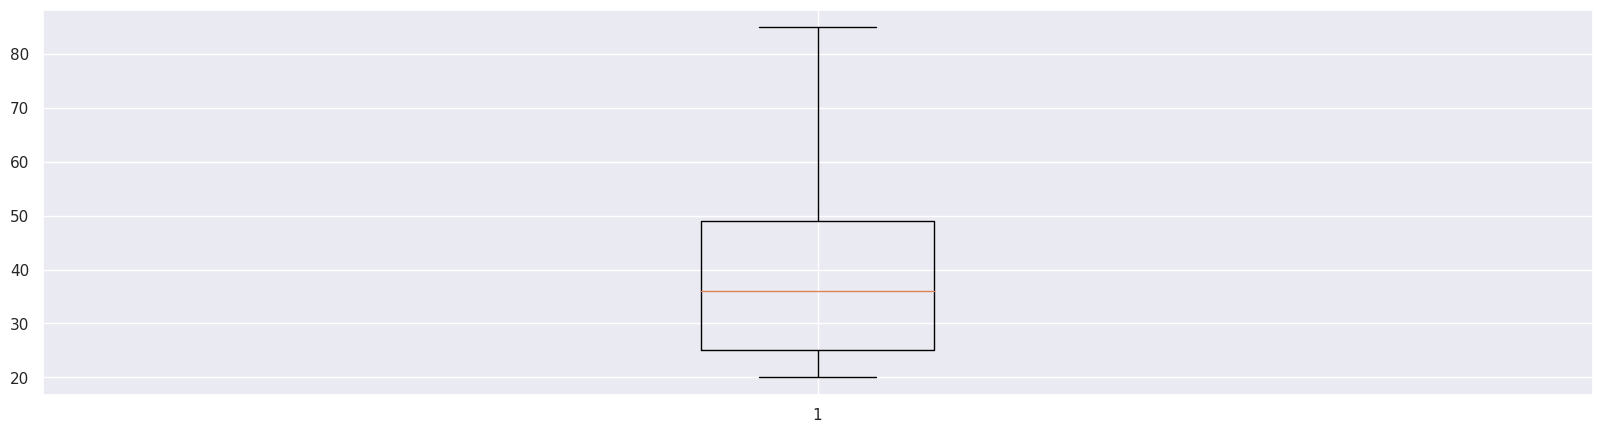

In [ ]:
plt.boxplot(data['Age'])

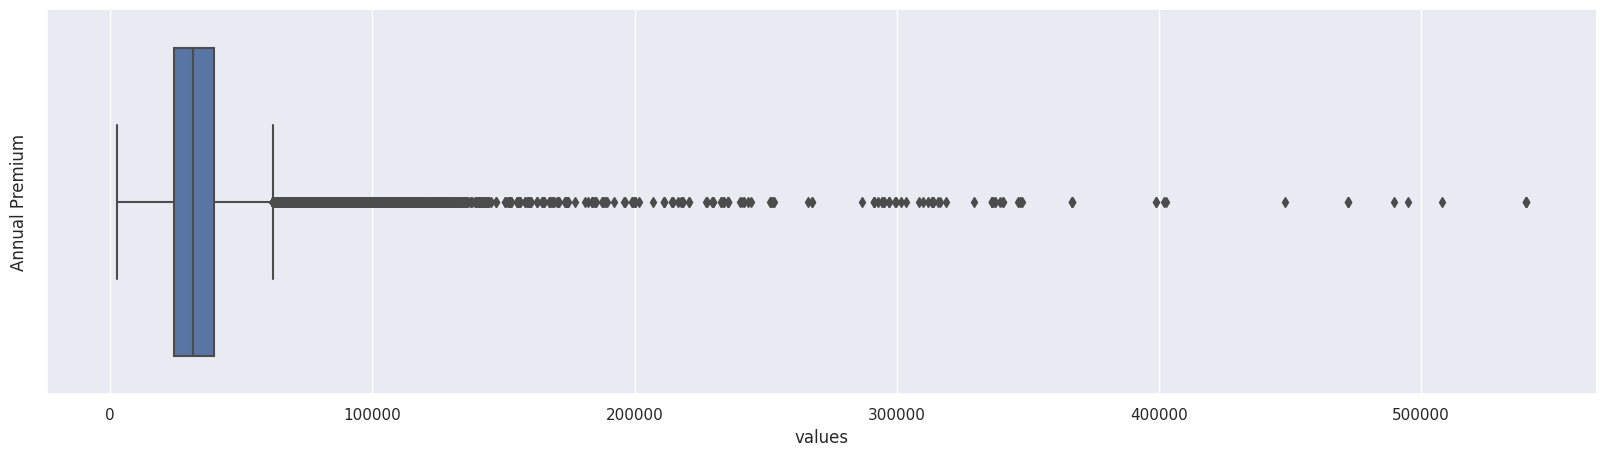

In [ ]:
sns.boxplot(x=data['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7939bd7c6e60>,
 'caps': [<matplotlib.lines.Line2D at 0x7939bd7c4af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7939bd7c7340>],
 'medians': [<matplotlib.lines.Line2D at 0x7939bd7c41f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7939bd7c4b20>],
 'means': []}

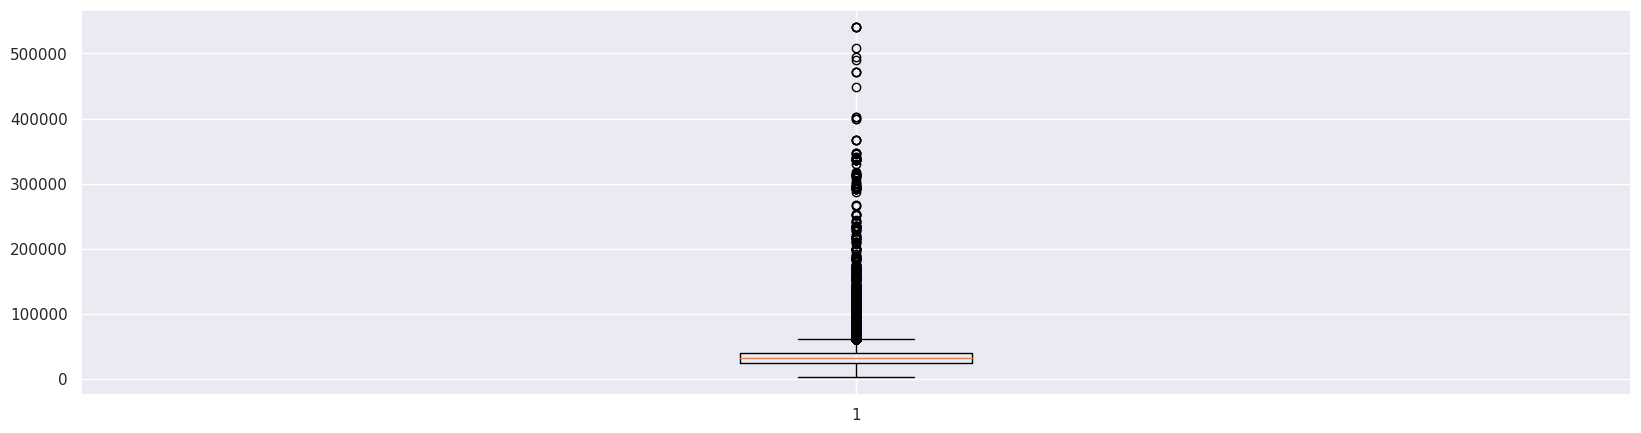

In [ ]:
plt.boxplot(data['Annual_Premium'])


In [ ]:
# Finding interquantile range

percentile25 = data['Annual_Premium'].quantile(0.25)
percentile75 = data['Annual_Premium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'upper limit = {upper_limit} \nlower limit = {lower_limit}')

upper limit = 61892.5 
lower limit = 1912.5


In [ ]:
# Capping the data above the upper limit to upper limit & below the lower limit to the lower limit

data['Annual_Premium'] = np.where(
    data['Annual_Premium'] > upper_limit,
    upper_limit,
    np.where(
        data['Annual_Premium'] < lower_limit,
        lower_limit,
        data['Annual_Premium']
    )
)

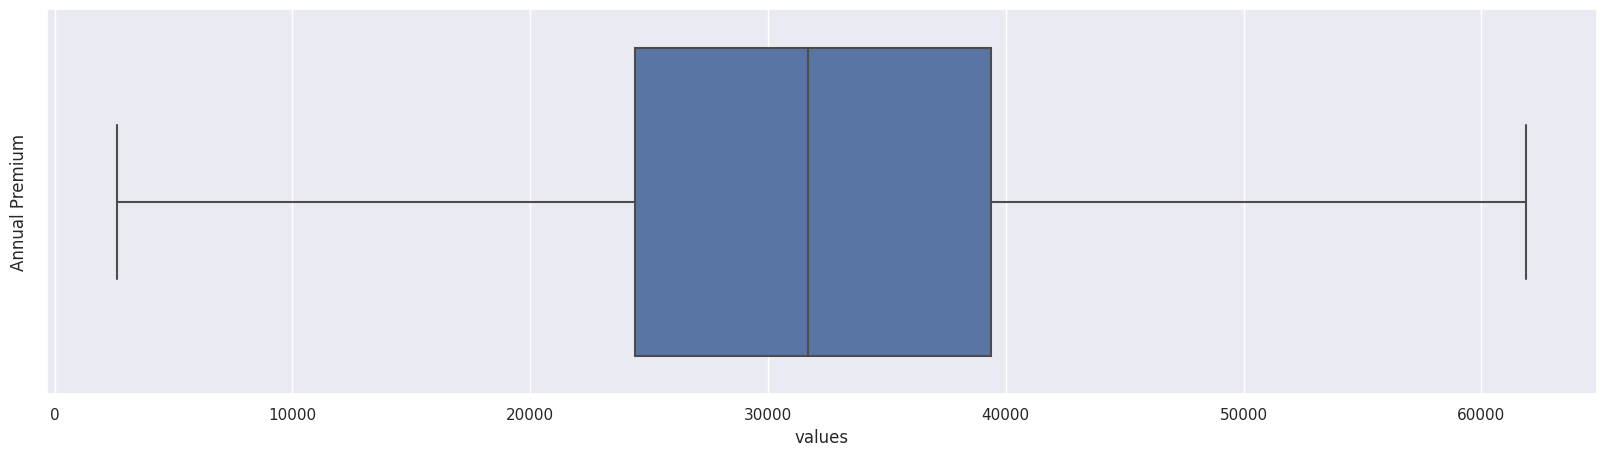

In [ ]:
sns.boxplot(x=data['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

What all outlier treatment techniques have you used and why did you use those techniques?

- 'Capping' method is used to treat outliers. Capping is a special transformation method in which you set the maximum values of a feature to a certain value.



### 3. Lets check for Multicolleanearity

In [ ]:
# Finding Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
cal_vif(data[[i for i in data.describe().columns if i not in ['Response']]])


,variables,VIF
0,Age,5.154515
1,Region_Code,4.457084
2,Annual_Premium,4.221447
3,Policy_Sales_Channel,3.669516
4,Vintage,4.004905


Since the VIF values of features are not beyond the standard threshold so there is no need to eradicate any feature.

### Categorical Encoding :

#### What all categorical encoding techniques have you used & why did you use those techniques?

In [ ]:
# Performimg one hot encoding Technique
df=pd.get_dummies(data,drop_first=True,sparse=True)


### 4. Feature Manipulation & Selection

#### 2. Feature Selection

Text(0.5, 31.046874999999986, 'Feature/Property')

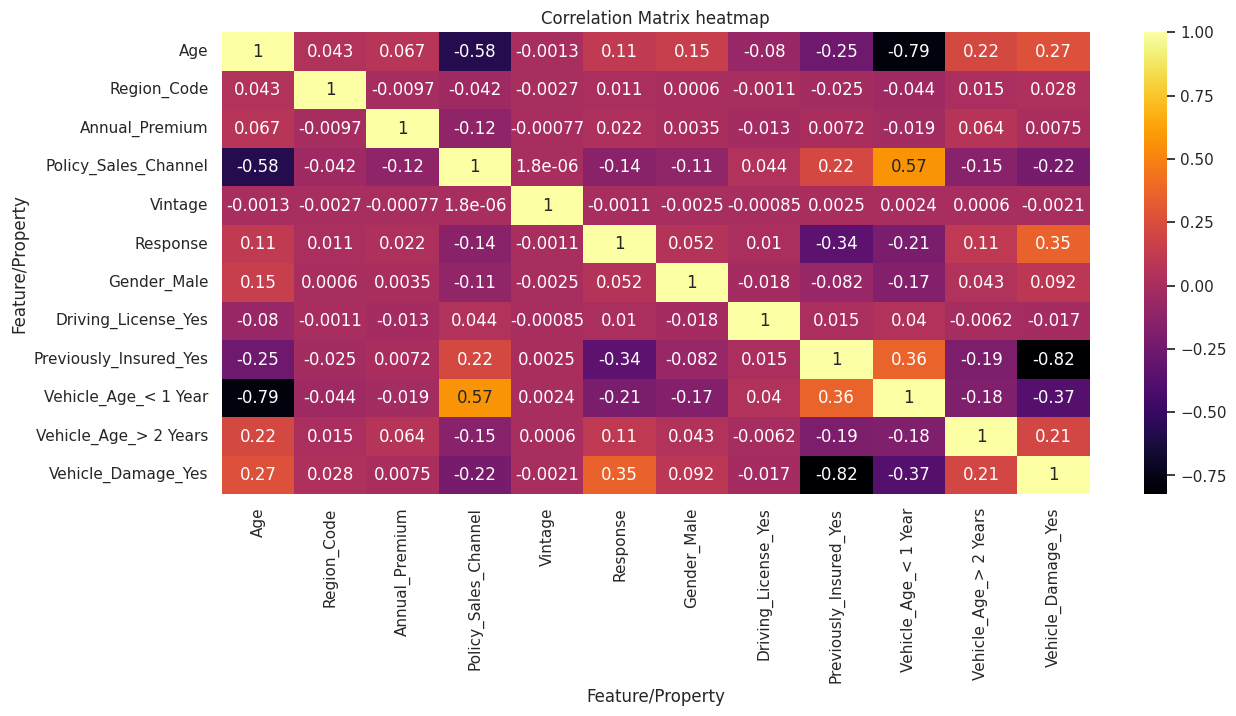

In [ ]:
# Select your features wisely to avoid overfitting

corr_matrix = df.corr()
plt.figure(figsize=(14,6))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

# Setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

Which all features you found important and why?

Refering to the correlation plot, we see that the columns are correlated not high nor low, Driving_License_Yes was less correlated so it is dropped. So as a part of feature selection there are not many input features who are showing similar patterns and trends so no need to eliminate any feature.

Since practically every customer has a driver's license, it is useless to insure anyone without one because it would be detrimental to the business. Hence, we wouldn't provide vehicle insurance to someone who didn't have a license to drive. As we can drop driving license column as they are not providing any valuable information..


In [ ]:
# dropping the Driving Licence Yes column.
df.drop(columns=['Driving_License_Yes'],axis=1,inplace=True)

In [ ]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,0,0


In [ ]:
df.shape[1]

11

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why

In [ ]:
# Checking the count of each response
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

As we can clearly see that the data is highly imbalanced and if pass this imbalanced data to the model without treating it the model will get biased towards one particular class thus affecting model generalization.

In [ ]:
# Defining the input an output variable for the model
X=df.drop(['Response'],axis=1)
y=df['Response']

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE to balance the data

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:

# Handling Imbalanced Dataset (If needed)
# Using SMOTE method

smote_var=SMOTE()
x_balanced, y_balanced = smote_var.fit_resample(X, y.ravel()) # y.ravel() is used to flatten the y array. ravel() converts it into a 1D array of shape (n_samples,).

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


After OverSampling, counts of label '1': 334399
After OverSampling, counts of label '0': 334399


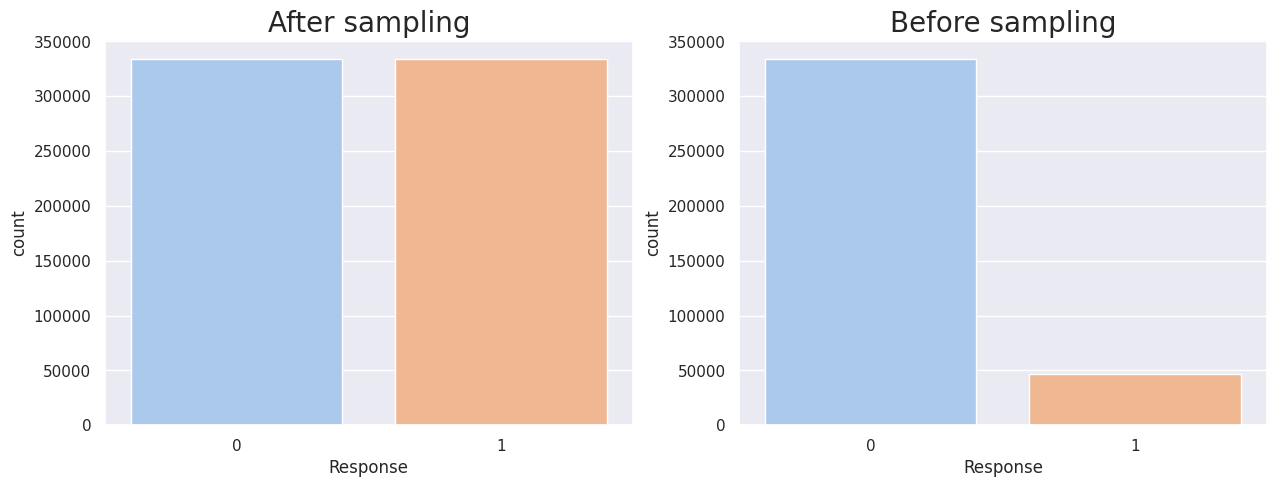

In [ ]:
# Visualizing the balanced dataset

plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x=df['Response'], data=df, palette='pastel')
plt.title('Before sampling',fontsize=20)

plt.subplot(1,2,1)
sns.countplot(x=y_balanced,palette='pastel')
plt.title('After sampling',fontsize=20)
plt.xlabel('Response')
plt.show()

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(x_balanced,y_balanced, test_size=0.2,random_state=21)

In [ ]:

# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


(535038, 10) (535038,)
(133760, 10) (133760,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***